In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import LineString, Polygon


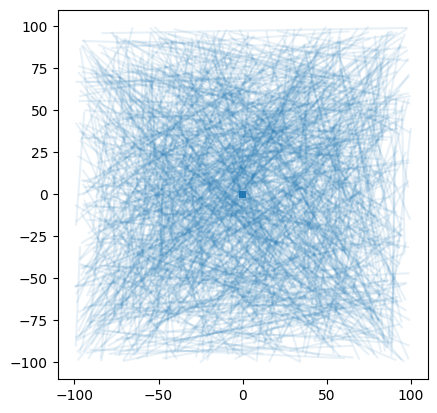

In [31]:
# The large square (simulating the continnetal space)
large_square = Polygon([(-100, -100), (100, -100), (100, 100), (-100, 100)])
# The small square (simulating the 100km level grid)
small_square = Polygon([(-2, -2), (2, -2), (2, 2), (-2, 2)])

line_list = []
line_list_geo = []
for i in range(100000):
    x1 = np.random.uniform(large_square.bounds[0], large_square.bounds[2])
    y1 = np.random.uniform(large_square.bounds[1], large_square.bounds[3])
    x2 = np.random.uniform(large_square.bounds[0], large_square.bounds[2])
    y2 = np.random.uniform(large_square.bounds[1], large_square.bounds[3])
    line_list.append((x1, y1, x2, y2))
    line_list_geo.append(LineString([(x1, x2), (y1, y2)]))
    

fig,ax = plt.subplots()
lines_gdf = gpd.GeoDataFrame(geometry=line_list_geo)
lines_gdf.sample(1000).plot(alpha=0.1, ax=ax)
square_gdf = gpd.GeoDataFrame(geometry=[small_square])
square_gdf.plot(alpha=0.9, ax=ax)
plt.show()



The lines are randomly generated movement lines. The blue square is to mimic a 100km-level grid.

In [5]:
def simulation():
    # The large square (simulating the continnetal space)
    large_square = Polygon([(-100, -100), (100, -100), (100, 100), (-100, 100)])
    # The small square (simulating the 100km level grid)
    small_square = Polygon([(-2, -2), (2, -2), (2, 2), (-2, 2)])

    line_list = []
    line_list_geo = []
    for i in range(100000):
        x1 = np.random.uniform(large_square.bounds[0], large_square.bounds[2])
        y1 = np.random.uniform(large_square.bounds[1], large_square.bounds[3])
        x2 = np.random.uniform(large_square.bounds[0], large_square.bounds[2])
        y2 = np.random.uniform(large_square.bounds[1], large_square.bounds[3])
        line_list.append((x1, y1, x2, y2))
        line_list_geo.append(LineString([(x1, x2), (y1, y2)]))
        

    lines_gdf = gpd.GeoDataFrame(geometry=line_list_geo)
    overlap = lines_gdf.sjoin(square_gdf, how="left").dropna()

    xgrid = np.linspace(-2,2,10+1)
    ygrid = np.linspace(-2,2,10+1)
    # fig,ax = plt.subplots()
    crossing_line_count_counter = []
    for subsquare_bound_x in range(len(xgrid[:-1])):
        for subsquare_bound_y in range(len(ygrid[:-1])):
            # simulating the 1km level grid
            sub_small_square = Polygon([
                (xgrid[subsquare_bound_x], ygrid[subsquare_bound_y]), 
                (xgrid[subsquare_bound_x + 1], ygrid[subsquare_bound_y]), 
                (xgrid[subsquare_bound_x + 1], ygrid[subsquare_bound_y + 1]), 
                (xgrid[subsquare_bound_x], ygrid[subsquare_bound_y + 1])
                ])
            sub_square_gdf = gpd.GeoDataFrame(geometry=[sub_small_square])
            # sub_square_gdf.plot(ax=ax, alpha=np.random.uniform(0,1))
            sub_square_gdf_overlap = lines_gdf.sjoin(sub_square_gdf, how="left").dropna()
            crossing_line_count = sub_square_gdf_overlap.shape[0]
            crossing_line_count_counter.append(crossing_line_count)   
            
    print(np.mean(crossing_line_count_counter) / overlap.shape[0])
            
    

In [6]:
# make 10 simulations
for i in range(10):
    simulation()

0.09889990089197224
0.09804056264311416
0.09812765957446808
0.09789974619289339
0.09684757118927972
0.09812666666666667
0.09883246977547495
0.0994372574385511
0.09894321766561513
0.09805747922437673


## Another way

In [29]:

# The large square (simulating the continnetal space)
large_square = Polygon([(-100, -100), (100, -100), (100, 100), (-100, 100)])
# The small square (simulating the 100km level grid)
small_square = Polygon([(-2, -2), (2, -2), (2, 2), (-2, 2)])

line_list = []
line_list_geo = []
for i in range(100000):
    x1 = np.random.uniform(large_square.bounds[0], large_square.bounds[2])
    y1 = np.random.uniform(large_square.bounds[1], large_square.bounds[3])
    x2 = np.random.uniform(large_square.bounds[0], large_square.bounds[2])
    y2 = np.random.uniform(large_square.bounds[1], large_square.bounds[3])
    line_list.append((x1, y1, x2, y2))
    line_list_geo.append(LineString([(x1, x2), (y1, y2)]))
    

lines_gdf = gpd.GeoDataFrame(geometry=line_list_geo)
overlap = lines_gdf.sjoin(square_gdf, how="left").dropna()

xgrid = np.linspace(-2,2,10+1)
ygrid = np.linspace(-2,2,10+1)
# fig,ax = plt.subplots()
crossing_line_count_counter = []
all_small_squares = []
for subsquare_bound_x in range(len(xgrid[:-1])):
    for subsquare_bound_y in range(len(ygrid[:-1])):
        # simulating the 1km level grid
        sub_small_square = Polygon([
            (xgrid[subsquare_bound_x], ygrid[subsquare_bound_y]), 
            (xgrid[subsquare_bound_x + 1], ygrid[subsquare_bound_y]), 
            (xgrid[subsquare_bound_x + 1], ygrid[subsquare_bound_y + 1]), 
            (xgrid[subsquare_bound_x], ygrid[subsquare_bound_y + 1])
            ])
        all_small_squares.append(sub_small_square)
        sub_square_gdf = gpd.GeoDataFrame(geometry=[sub_small_square])
        # sub_square_gdf.plot(ax=ax, alpha=np.random.uniform(0,1))
        sub_square_gdf_overlap = lines_gdf.sjoin(sub_square_gdf, how="left").dropna()
        crossing_line_count = sub_square_gdf_overlap.shape[0]
        crossing_line_count_counter.append(crossing_line_count)   
       
all_small_squares = gpd.GeoDataFrame(geometry=all_small_squares) 
print(np.mean(crossing_line_count_counter) / overlap.shape[0])
        


0.09743013170575009


Text(0.5, 1.0, 'How many small grids (1x1km level) each route goes through')

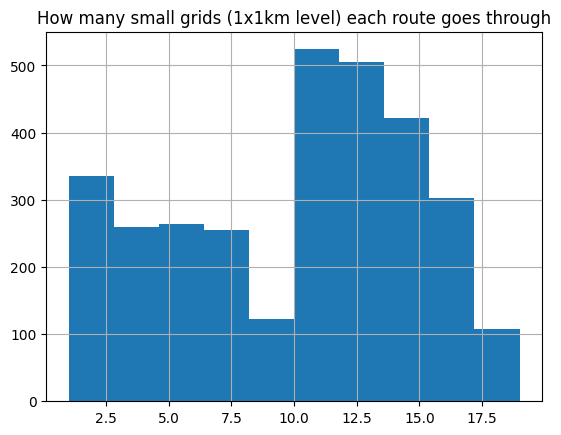

In [40]:
fig,ax = plt.subplots()
lines_gdf.sjoin(
    all_small_squares, how="left"
    ).dropna().reset_index(drop=False).groupby('index').count()['index_right'].hist(ax=ax)
ax.set_title('How many small grids (1x1km level) each route goes through')


Suppose N is the flux across grid K.

(N / 100) * 10 = 0.1N

First evenly divided by 100, because 100 grids in 1 large grid. Then times 10, because each route should be counted 10 times (one average each route goes through 10 smaller grids).